# Figure 4 (main text)


In [1]:
cd '/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC'

/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC


In [2]:
# preamble
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy import signal,stats
from scipy.interpolate import interp1d
from pyleoclim.utils import tsutils


mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10
mpl.rcParams["mathtext.fontset"] = "dejavusans"

plt.style.use('default')

mis_bounds = pd.read_csv('data/misc/LR04_MISboundaries.txt')
# remove sub-stages from table\n",
mis_bounds.drop([4,5,6,7,8],inplace=True)
mis_bounds.iloc[-1] = {'MIS':'0/1','Age(ka)':0}
mis_bounds.sort_values('Age(ka)',inplace=True)
mis_bounds.reset_index(drop=True,inplace=True)


### define age_model function
def age_model(depth_in,ties):
    f = interp1d(ties.iloc[:,0],ties.iloc[:,1],fill_value='extrapolate')
    age = f(depth_in)
    return age

In [7]:
def filtered(x,y,highcut,tnew = [0,0]):
    """ Interpolate to linear scale and apply low-pass butterworth filter
    
   
    returns:
    x_lin -- the linear scale for the desired record
    r_filt -- the filtered RGB red record
    r_lin -- the linearly inteprolated RGB red record
    """
    fs = np.mean(np.diff(x))

    if len(tnew)>2:
        x_lin = tnew
    else:
        minx = np.min(x)+1
        maxx = np.max(x)-1
        x_lin = np.arange(minx,maxx,fs)
    f = interp1d(x,y,fill_value='extrapolate')
    y_lin = f(x_lin)
    y_filt = butter_lowpass_filter(y_lin, highcut, 1/fs, order=5)
    return x_lin, y_filt, y_lin

def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut/nyq
    b, a = signal.butter(order, high, btype='low',analog=False)
    return b, a

def butter_lowpass_filter(data, highcut, fs = 0.5, order=6):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y



lpf = 1/4


In [8]:
# load data
## ---- APcomp! ---- ##
apcomp = pd.read_csv('tables/ap_comp_ss.csv')

##### external data #####
## ---- ODP1123 ---- ##
odp1123_ss = pd.read_csv('tables/odp1123_ss.csv')

## ---- Drake Passage records ---- ##
ps97_ss = pd.read_csv('tables/ps97_ss.csv')
ps97_085 = pd.read_csv('tables/ps97_085_ss.csv')

## ---- U1540/U1541 ---- ##
u1540_ss = pd.read_csv('tables/u1540_ss.csv')
u1541_ss = pd.read_csv('tables/u1541_ss.csv')

## ---- De boer ice sheet model ---- ##
deboer = pd.read_excel('data/external_data.xlsx',sheet_name='ANICE_model',header=16)

## ---- GAST ---- ##
gast = pd.read_excel('data/external_data.xlsx',sheet_name='GAST',header=12)

## ---- Prob Stack ---- ##
prob = pd.read_excel('data/external_data.xlsx',sheet_name='Prob_Stack',header=9)

## ---- Orbital ---- ##
from climlab import constants as const
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation
kyears = np.arange(-5000, 1,0.5) # specify time interval and units
orb = OrbitalTable.interp(kyear=kyears) # subset of orbital parameters for specified time
orb = orb.to_dataframe()
orb.reset_index(inplace=True)
orb.kyear=orb.kyear*-1
orb.sort_values(by='kyear',inplace=True)
orb.reset_index(inplace=True,drop=True)
orb['precession'] = orb['precession']


Tokenization took: 1.33 ms
Type conversion took: 0.64 ms
Parser memory cleanup took: 0.00 ms


In [15]:
#### Load MIS table
mis_table = pd.read_csv('tables/mistable.csv')
mis_stds = pd.read_csv('tables/mistable_stds.csv')
mis_stds.head()


,MIS,SS_max,SS_min,U1541_max,U1541_min,AIS_max,AIS_min
0,1.0,0.270837,0.433649,0.163107,0.437625,1.133652,0.092792
1,2.0,0.361874,1.027283,0.125196,0.114234,0.068196,0.102289
2,3.0,1.220733,0.417841,0.033412,0.145379,0.124742,0.068547
3,4.0,0.972701,0.630447,0.093948,0.121490,0.102339,0.243312
4,5.0,0.193547,0.244818,0.189019,0.176888,0.146143,0.097670


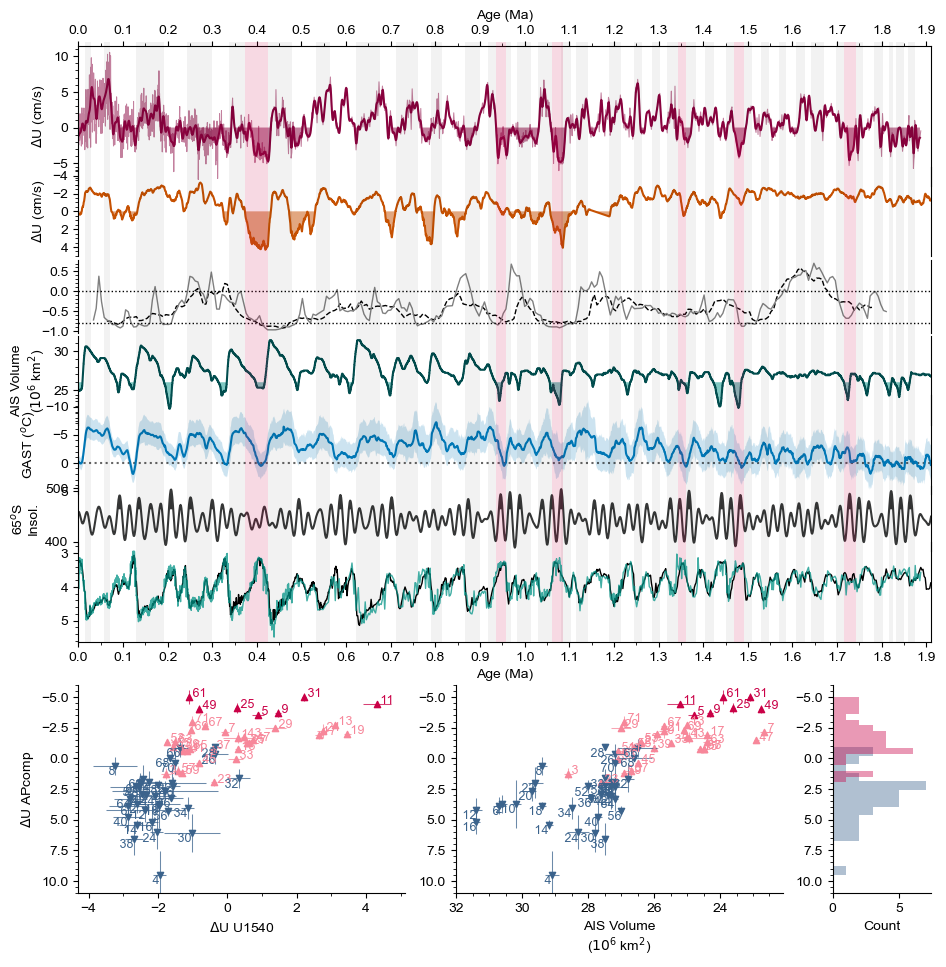

In [19]:
from matplotlib import gridspec
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10
mpl.rcParams["mathtext.fontset"] = "dejavusans"

f = plt.figure(figsize=(13,10))
gs = gridspec.GridSpec(9,3,height_ratios=[1.3,0.9,0.75,0.9,1,0.65,1,0.6,2.1],width_ratios=[1,1,0.3],hspace=-0.08)
ax1 = f.add_subplot(gs[8,0])
ax2 = f.add_subplot(gs[8,1])
ax3 = f.add_subplot(gs[8,2])

ax = {}
for i in [0,1,2,3,4,5,6]:
    if i==0:
        ax[i]=f.add_subplot(gs[i,0:])
    else:
        ax[i]=f.add_subplot(gs[i,0:])

c1 = '#89023e'
c2 = '#023e8a'
c3 = '#0077b6'

### SS records
n = apcomp['dU_dhol_mccave'].notnull()
ax[0].plot(apcomp['LR04_age'][n],apcomp['dU_dhol_mccave'][n],color=c1,alpha=0.5,lw=0.75)
#ax[0].plot(apcomp['LR04_age'][n],apcomp['SS_unitv'][n].rolling(6).mean(),color=c1,lw=1.5)
t,y,pp = filtered(apcomp['LR04_age'][n],apcomp['dU_dhol_mccave'][n],1/7)
y0 = y.copy()
y0[y0>0]=0
ax[0].fill_between(t,0,y0,alpha=0.5,ec='none',fc=c1)
ax[0].plot(t,y,color=c1)
ax[0].set_ylabel('$\Delta$U (cm/s)')
ax[0].yaxis.set_major_locator(MultipleLocator(5))
ax[0].yaxis.set_minor_locator(MultipleLocator(1))
# ## ODP 1123
# x = odp1123_ss['LR04 Age (Elderfield 2012)']
# y = odp1123_ss['dU_dhol_mccave']
# yerr = odp1123_ss['dU_dhol_mccave_2std']
# n = y.notnull()
# c9 = 'xkcd:dusk'
# ax[2].plot(x[n],y[n],color=c9,alpha=0.5,lw=0.75)
# t,y,pp = filtered(x[n],y[n],1/7)
# y0 = y.copy()
# y0[y0>0]=0
# ax[2].plot(t,y,color=c9)
# ax[2].set_ylabel('$\Delta$U (cm/s)')

# ## PS97
# x = ps97_ss['Revised Age (Starr)']
# y = ps97_ss['dU_dhol_wu']
# n = y.notnull()
# c10 = 'xkcd:dark orange'
# ax[2].plot(x[n],y[n],color=c10,alpha=0.5,lw=0.75)
# t,y,pp = filtered(x[n],y[n],1/7)
# y0 = y.copy()
# y0[y0>0]=0
# ax[2].plot(t,y,color=c10)
# ax[2].set_ylabel('$\mathrm{\Delta U}}$ (cm/s)')

## U1541
x = u1541_ss['Age [ka BP]']
y = u1541_ss['dU_dhol_mccave']
n = y.notnull()
c10 = 'xkcd:dark orange'
ax[1].plot(x[n],y[n],color=c10)

y0 = y.copy()
y0[y0<0]=0
ax[1].fill_between(x,0,y0,alpha=0.5,ec='none',fc=c10)
ax[1].set_ylabel('$\Delta$U (cm/s)')
ax[1].yaxis.set_major_locator(MultipleLocator(2))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.5))

#### rolling correlation
bin_start = 1
bin_stop = 1860
bin_size = 6
bindf = pd.DataFrame()
x = apcomp['LR04_age']
y = apcomp['SS_dHolocene']
n=y.notnull()
results = tsutils.bin(x[n],y[n],bin_size=bin_size, start=bin_start, stop=bin_stop)
bindf['t'] = results['bins']
bindf['apcomp'] = results['binned_values']
x = u1541_ss['Age [ka BP]']
y = u1541_ss['SS_dHolocene']
n=y.notnull()
results = tsutils.bin(x[n],y[n],bin_size=bin_size, start=bin_start, stop=bin_stop)
bindf['u1541'] = results['binned_values']

for col in bindf.columns[1:]:
    bindf[col] = (bindf[col]-bindf[col].mean())/bindf[col].std()

rolling_corr = bindf['apcomp'].rolling(20,center=True).corr(bindf['u1541'])
ax[2].plot(bindf['t'],rolling_corr,color='k',linestyle='--',lw=1)
rolling_corr = bindf['apcomp'].rolling(10,center=True).corr(bindf['u1541'])
ax[2].plot(bindf['t'],rolling_corr,color='grey',linestyle='-',lw=1)
ax[2].axhline(-0.8,color='k',linestyle=':',lw=1)
ax[2].axhline(0,color='k',linestyle=':',lw=1)
ax[2].yaxis.set_major_locator(MultipleLocator(0.5))
ax[2].yaxis.set_minor_locator(MultipleLocator(0.1))

## deboer AIS volume
x = deboer['Age']
y = deboer['AnIS-V'].copy()
ax[3].plot(x,y,color='xkcd:dark teal')
y0=y
y0[y0>26]=26
ax[3].fill_between(x,26,y,ec='none',fc='xkcd:teal',alpha=0.5)
ax[3].set_ylabel('AIS Volume\n($10^6$ km$^2$)')
ax[3].yaxis.set_major_locator(MultipleLocator(5))
ax[3].yaxis.set_minor_locator(MultipleLocator(1))

c8 = 'xkcd:prussian blue'
y = gast[0.5]
t = gast['Time (kyr BP)']
ax[4].fill_between(t,gast[0.025],gast[0.975],fc=c3,alpha=0.2)
ax[4].axhline(0,color='k',alpha=0.6,linestyle=':')
ax[4].plot(t,y,color=c3,ms=0,alpha=1)
ax[4].invert_yaxis()
ax[4].set_ylabel('GAST ($^o$C)')
ax[4].yaxis.set_major_locator(MultipleLocator(5))
ax[4].yaxis.set_minor_locator(MultipleLocator(1))
## orbital
x = orb['kyear']
y = orb['65SJan'].copy(deep=True) 
ax[5].plot(x,y,color='xkcd:dark grey')
y[y<460]=460
ax[5].fill_between(x,460,y,fc='k',ec='none',alpha=0.8)
ax[5].set_ylabel('65$^o$S\nInsol.')

### bd18o
ax[6].plot(prob['Age [kyr]'],prob['d18O_stack'],label='Prob-Stack',color='k',lw=1)
n = apcomp['Cwu d18O (VPDB)'].notnull()
ax[6].plot(apcomp['LR04_age'][n],apcomp['Cwu d18O (VPDB)'][n]+0.43,label='APcomp',color='xkcd:teal',marker='^',ms=0,lw=1,alpha=0.75)
# n = odp1123_d18o['d18O Uvi'].notnull()
# ax[3].plot(odp1123_d18o['Age LR04 (ky)'][n],odp1123_d18o['d18O Uvi'][n],label='ODP1123',color='xkcd:mauve',alpha=0.6,lw=1)
ax[6].invert_yaxis()
#ax[6].set_ylabel('$\mathrm{\delta^{18}O_{benthic}}$\n$(^o/_{oo})}$')
ax[0].xaxis.set_minor_locator(MultipleLocator(50))
ax[6].xaxis.set_minor_locator(MultipleLocator(50))
ax[0].set_xlabel('Age (Ma)')
ax[0].xaxis.set_label_position('top')
ax[6].set_xlabel('Age (Ma)')
ax[6].yaxis.set_major_locator(MultipleLocator(1))
ax[6].yaxis.set_minor_locator(MultipleLocator(0.2))
####### format
for i in [0,1,2,3,4,5,6]:
    ax[i].set_xlim(0,1910)
    ax[i].set_xticks(np.arange(0,2000,100))
    tik = ax[i].get_xticks()
    tik = tik/1000
    ax[i].set_xticklabels(tik.astype(str))

for i in [0,1,2,3,4,5,6]:
    ax[i].patch.set_visible(False)
    if i != 0:
        ax[i].spines['top'].set_visible(False)
    if (i != 6)&(i != 0):
        ax[i].xaxis.set_ticks_position('none')
        ax[i].set_xticklabels([])
        ax[i].spines['bottom'].set_visible(False)
    if i == 0:
        ax[i].spines['bottom'].set_visible(False)
        ax[i].xaxis.set_ticks_position('top')

ymax = 6.05
# ax[-1].axvspan(12,19,clip_on=False,ymax=ymax,alpha=0.1)
for i in range(0,71):
    if i%2==1:
        ax[6].axvspan(mis_bounds['Age(ka)'].loc[i],mis_bounds['Age(ka)'].loc[i+1],facecolor='k',alpha=0.05,ymax=ymax,clip_on=False,zorder=-1)
cop = 'xkcd:ruby'
ax[6].axvspan(mis_bounds['Age(ka)'].loc[24],mis_bounds['Age(ka)'].loc[25],facecolor=cop,alpha=0.15,ymax=ymax,clip_on=False,zorder=-1)
ax[6].axvspan(mis_bounds['Age(ka)'].loc[30],mis_bounds['Age(ka)'].loc[31]+5,facecolor=cop,alpha=0.15,ymax=ymax,clip_on=False,zorder=-1)
ax[6].axvspan(mis_bounds['Age(ka)'].loc[10],mis_bounds['Age(ka)'].loc[11],facecolor=cop,alpha=0.15,ymax=ymax,clip_on=False,zorder=-1)
ax[6].axvspan(mis_bounds['Age(ka)'].loc[48],mis_bounds['Age(ka)'].loc[49],facecolor=cop,alpha=0.15,ymax=ymax,clip_on=False,zorder=-1)
ax[6].axvspan(mis_bounds['Age(ka)'].loc[42],mis_bounds['Age(ka)'].loc[43],facecolor=cop,alpha=0.15,ymax=ymax,clip_on=False,zorder=-1)
ax[6].axvspan(mis_bounds['Age(ka)'].loc[60],mis_bounds['Age(ka)'].loc[61],facecolor=cop,alpha=0.15,ymax=ymax,clip_on=False,zorder=-1)
  
    
box = ax[1].get_position()
box.y0=box.y0-0.02
ax[1].set_position(box)

box = ax[0].get_position()
box.y0=box.y0-0.01
ax[0].set_position(box)

box = ax[2].get_position()
box.y0=box.y0-0.01
ax[2].set_position(box)

####### 
ss_glac = mis_table[mis_table.index%2==1]
ss_in = mis_table[mis_table.index%2==0]

for i in mis_table.index:
    x = mis_table.loc[i]['u1541']
    y = mis_table.loc[i]['SS']
    if i%2==1:
        yerr = mis_stds.loc[i]['SS_max']*2
        xerr = mis_stds.loc[i]['U1541_max']*2

        ax1.errorbar(x,y,xerr=xerr,yerr=yerr,marker='o',ms=1,c='xkcd:denim',elinewidth=0.75,alpha=0.75)
        ax1.scatter(x,y,20,marker='v',fc='xkcd:denim')
        ax1.text(x,y,' '+str(round(i+1)),color='xkcd:denim',fontweight='normal',fontsize=9,ha='right',va='top')

    else:
        yerr = mis_stds.loc[i]['SS_min']
        xerr = mis_stds.loc[i]['U1541_min']
        if i+1 in [5,9,11,25,31,49,61]:
            ax1.errorbar(x,y,xerr=xerr,yerr=yerr,marker='o',ms=1,c='xkcd:ruby',elinewidth=0.75,alpha=0.75)
            ax1.scatter(x,y,20,marker='^',fc='xkcd:ruby')
            ax1.text(x,y,' '+str(round(i+1)),color='xkcd:ruby',fontweight='normal',fontsize=9)

        else:
            ax1.errorbar(x,y,xerr=xerr,yerr=yerr,marker='o',ms=1,c='xkcd:rose pink',elinewidth=0.75,alpha=0.75)
            ax1.scatter(x,y,20,marker='^',fc='xkcd:rose pink')    
            ax1.text(x,y,' '+str(round(i+1)),color='xkcd:rose pink',fontweight='normal',fontsize=9)

for i in mis_table.index:
    x = mis_table.loc[i]['AIS_db']
    y = mis_table.loc[i]['SS']
    if i%2==1:
        yerr = mis_stds.loc[i]['SS_max']*2
        xerr = mis_stds.loc[i]['AIS_max']*2

        ax2.errorbar(x,y,xerr=xerr,yerr=yerr,marker='o',ms=1,c='xkcd:denim',elinewidth=0.75,alpha=0.75)
        ax2.scatter(x,y,20,marker='v',fc='xkcd:denim')
        ax2.text(x,y,' '+str(round(i+1)),color='xkcd:denim',fontweight='normal',fontsize=9,ha='right',va='top')

    else:
        yerr = mis_stds.loc[i]['SS_min']
        xerr = mis_stds.loc[i]['U1541_min']

        if i+1 in [5,9,11,25,31,49,61]:
            ax2.errorbar(x,y,xerr=xerr,yerr=yerr,marker='o',ms=1,c='xkcd:ruby',elinewidth=0.75,alpha=0.75)
            ax2.scatter(x,y,20,marker='^',fc='xkcd:ruby')
            ax2.text(x,y,' '+str(round(i+1)),color='xkcd:ruby',fontweight='normal',fontsize=9)

        else:
            ax2.errorbar(x,y,xerr=xerr,yerr=yerr,marker='o',ms=1,c='xkcd:rose pink',elinewidth=0.75,alpha=0.75)
            ax2.scatter(x,y,20,marker='^',fc='xkcd:rose pink')    
            ax2.text(x,y,' '+str(round(i+1)),color='xkcd:rose pink',fontweight='normal',fontsize=9)

    
    
sns.histplot(data=ss_glac,y='SS',ax=ax3,color='xkcd:denim',fill=True,stat='count',alpha=0.4,bins=15,edgecolor='none')
sns.histplot(data=ss_in,y='SS',ax=ax3,color='xkcd:ruby',fill=True,stat='count',alpha=0.4,bins=15,edgecolor='none')
    
# ax3.axhline(mis_table.loc[32]['SS'],linestyle='--',color='xkcd:dark grey')
# ax3.axhline(mis_table.loc[12]['SS'],linestyle='--',color='xkcd:dark grey')
# ax3.axhline(mis_table.loc[24]['SS'],linestyle='--',color='xkcd:dark grey')


ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_ylabel('$\Delta$U APcomp')

# ax1.set_xlabel('$\mathrm{\delta^{18}O_{benthic}}$\n$(^o/_{oo})}$')
ax1.set_xlabel('$\Delta$U U1540')
ax2.set_xlabel('AIS Volume\n($10^6$ km$^2$)')
ax1.invert_xaxis()
ax2.invert_xaxis()



for a in [ax1,ax2,ax3]:
    a.set_ylim(-6,11)
    a.yaxis.set_minor_locator(MultipleLocator(0.5))
    a.invert_yaxis()


ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax3.set_ylabel('')


ax[1].set_ylim(-5,5)

box = ax[1].get_position()
box.y0 = box.y0+0.02
ax[1].set_position(box)

box = ax[2].get_position()
box.y0 = box.y0
box.y1 = box.y1-0.011
ax[2].set_position(box)

box = ax[3].get_position()
box.y0 = box.y0-0.02
box.y1 = box.y1-0.02
ax[3].set_position(box)

f.set_size_inches(11,11)

ax[1].invert_yaxis()
ax1.invert_xaxis()
plt.savefig('figures/F4_draft.pdf',bbox_inches='tight')

In [22]:
rcor

t  apcomp  u1541
0   t      NaN     NaN    NaN
    apcomp NaN     NaN    NaN
    u1541  NaN     NaN    NaN
1   t      NaN     NaN    NaN
    apcomp NaN     NaN    NaN
...         ..     ...    ...
297 apcomp NaN     NaN    NaN
    u1541  NaN     NaN    NaN
298 t      NaN     NaN    NaN
    apcomp NaN     NaN    NaN
    u1541  NaN     NaN    NaN

[897 rows x 3 columns]